This notebook is used to test that the functions are working properly (entering an input with a already known output) and to compare the hourly to quarter-hourly, the winter to spring and a long to short time series results.

In [17]:
import os
import glob
import datetime
import matplotlib.pylab as plt
import matplotlib.ticker as ticker
from matplotlib.patches import Ellipse
import numpy as np
from IPython.display import display, Math, Latex
import angles

import netCDF4 as nc
from scipy.optimize import curve_fit
from salishsea_tools import (viz_tools,tidetools as tt, nc_tools)
from salishsea_tools.nowcast import (research_VENUS, analyze)

%matplotlib inline

#Testing the functions
##Narrow Inlet
In a narrow inlet we expect a rectilinear tidal ellipse, a cos function for the u velcoties and 0 for the v velocities. If everything is working properly the output should be a line.

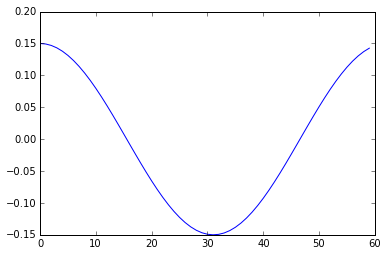

In [18]:
uamp = 0.15
upha = 0
vamp= 0
vpha = 0

x = np.arange(0,12,.2)

u = uamp*np.cos(tt.M2FREQ*x + upha)
v = vamp*np.cos(tt.M2FREQ*x + vpha)

plt.plot(u)


In [19]:
uM2amp, uM2pha, uK1amp, uK1pha = tt.fittit(u,x)
vM2amp, vM2pha, vK1amp, vK1pha = tt.fittit(v,x)

In [20]:
CX, SX, CY, SY, ap, am, ep, em, major, minor, theta, phase= tt.ellipse_params(uM2amp, uM2pha, vM2amp, vM2pha)

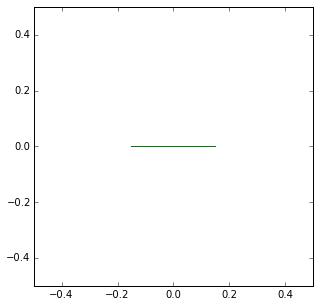

In [21]:
plt.figure(figsize=(5,5))
plt.plot(u,v)
plt.xlim(-0.5,0.5)
plt.ylim(-0.5,0.5)
x=np.arange(0,95)
plt.plot(CX*np.cos(tt.M2FREQ*x)+SX*np.sin(tt.M2FREQ*x),
         CY*np.cos(tt.M2FREQ*x)+SY*np.sin(tt.M2FREQ*x));

As expected the tidal ellipse is rectilinear.
##Open-ocean Test
In the open ocean u and v should have the same amplitude and phase. One will be cos and one will be sin. We expect the tidal ellipse results to be a circle.

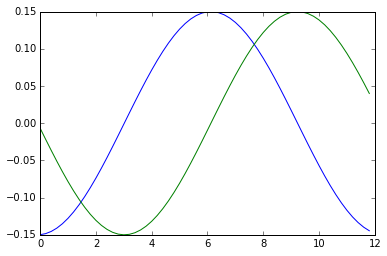

In [22]:
uamp = 0.15
upha = 110
vamp= 0.15
vpha = 110

x = np.arange(0,12,.2)

u = uamp*np.cos(tt.M2FREQ*x + upha)
v = vamp*np.sin(tt.M2FREQ*x + vpha)

plt.plot(x, u)
hold=True
plt.plot(x, v)

In [23]:
uM2amp, uM2pha, uK1amp, uK1pha = tt.fittit(u,x)
vM2amp, vM2pha, vK1amp, vK1pha = tt.fittit(v,x)

In [24]:
CX, SX, CY, SY, ap, am, ep, em, major, minor, theta, phase= tt.ellipse_params(uM2amp, uM2pha, vM2amp, vM2pha)

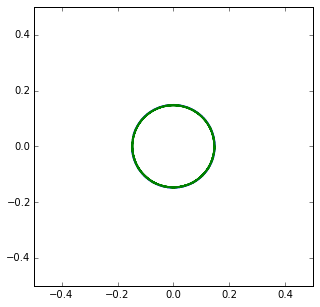

In [25]:
plt.figure(figsize=(5,5))
plt.plot(u,v)
plt.xlim(-0.5,0.5)
plt.ylim(-0.5,0.5)
x=np.arange(0,95)
plt.plot(CX*np.cos(tt.M2FREQ*x)+SX*np.sin(tt.M2FREQ*x),
         CY*np.cos(tt.M2FREQ*x)+SY*np.sin(tt.M2FREQ*x));

As expected the tidal ellipse is a circle.

##Testing phase 

###Case A: phase = 0

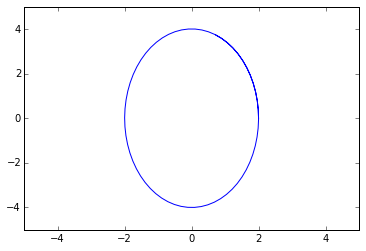

In [26]:
phi = 0
w1 = 2
w2 = 4

t = np.arange(0,15,.2)
plt.xlim(-5,5)
plt.ylim(-5,5)
u = w1*np.cos(tt.M2FREQ*t-phi)
v = w2*np.sin(tt.M2FREQ*t-phi)
plt.plot(u,v)


In [27]:
uM2amp, uM2pha, uK1amp, uK1pha = tt.fittit(u,t)
vM2amp, vM2pha, vK1amp, vK1pha = tt.fittit(v,t)
print uM2amp, uM2pha

1.99999999771 1.23276171049e-07


In [28]:
CX, SX, CY, SY, ap, am, ep, em, majora, minora, thetaa, phasea= tt.ellipse_params(uM2amp, uM2pha, vM2amp, vM2pha)

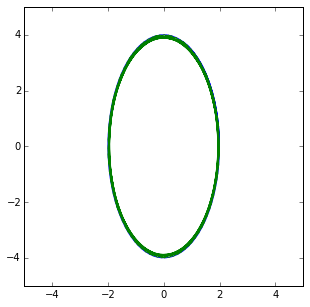

In [29]:
plt.figure(figsize=(5,5))
plt.plot(u,v)
plt.xlim(-5,5)
plt.ylim(-5,5)
t=np.arange(0,95)
plt.plot(CX*np.cos(tt.M2FREQ*t-phasea)+SX*np.sin(tt.M2FREQ*t-phasea),
         CY*np.cos(tt.M2FREQ*t-phasea)+SY*np.sin(tt.M2FREQ*t-phasea));

In [30]:
print majora, minora, thetaa, phasea

3.99999999895 1.99999999771 89.9999999256 269.999999975


###Case B phase= 100

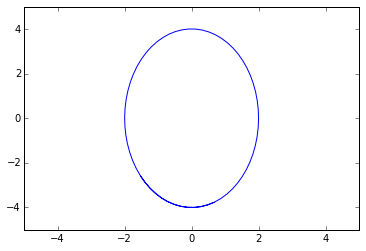

In [31]:
phi = np.deg2rad(0)
w1 = 2
w2 = 4

t = np.arange(0,15,.2)
plt.xlim(-5,5)
plt.ylim(-5,5)

u = w1*np.cos(tt.M2FREQ*t-phi)
v = w2*np.sin(tt.M2FREQ*t-phi)
plt.plot(u,v)

In [32]:
uM2amp, uM2pha, uK1amp, uK1pha = tt.fittit(u,t)
vM2amp, vM2pha, vK1amp, vK1pha = tt.fittit(v,t)
print uM2amp, uM2pha, vM2pha

1.99999999902 139.436692589 -130.563307313


In [33]:
uM2pha = uM2pha+180
vM2pha = vM2pha+180

In [34]:
CX, SX, CY, SY, ap, am, ep, em, major, minor, theta, phase= tt.ellipse_params(uM2amp, uM2pha, vM2amp, vM2pha)

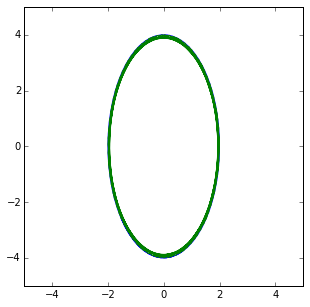

In [35]:
plt.figure(figsize=(5,5))
plt.plot(u,v)
plt.xlim(-5,5)
plt.ylim(-5,5)
t=np.arange(0,95)
plt.plot(CX*np.cos(tt.M2FREQ*t-phi)+SX*np.sin(tt.M2FREQ*t-phi),
         CY*np.cos(tt.M2FREQ*t-phi)+SY*np.sin(tt.M2FREQ*t-phi));

In [36]:
print theta, phase, phase-phasea

90.0000000656 229.43669272 -40.5633072544


The difference between the phases should be the same as the original difference between the phis and all the other parameters should remain the same.
We are calculating phase properly because this is true.

We added the floor function in the ellipse param code and now my conclusion above is no longer true...

Let's look deeper into ellipse_param

##More tests for phase

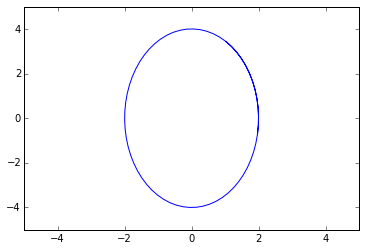

In [251]:
phi = np.deg2rad(10)
w1 = 2
w2 = 4

t = np.arange(0,15,.2)
plt.xlim(-5,5)
plt.ylim(-5,5)

u = w1*np.cos(tt.M2FREQ*t-phi)
v = w2*np.sin(tt.M2FREQ*t-phi)
plt.plot(u,v)

In [252]:
uM2amp, uM2pha, uK1amp, uK1pha = tt.fittit(u,t)
vM2amp, vM2pha, vK1amp, vK1pha = tt.fittit(v,t)
print uM2amp, uM2pha, vM2pha

1.99999999992 10.0000000229 99.9999999989


In [253]:
def ellipse_params(uamp, upha, vamp, vpha):
    CX = uamp*np.cos(np.pi*upha/180.)
    SX = uamp*np.sin(np.pi*upha/180.)
    CY = vamp*np.cos(np.pi*vpha/180.)
    SY = vamp*np.sin(np.pi*vpha/180.)
    ap = np.sqrt((CX+SY)**2+(CY-SX)**2)/2.
    am = np.sqrt((CX-SY)**2+(CY+SX)**2)/2.
    ep = np.arctan2(CY-SX, CX+SY)
    em = np.arctan2(CY+SX, CX-SY)
    major = ap+am
    minor = ap-am
    theta = (ep+em)/2.*180./np.pi
    phase = (em-ep)/2.*180./np.pi
    print phase, theta
    # Make angles be between [0,360]
    phase = (phase+360) % 360
    theta = (theta+360) % 360
    print phase, theta
    ind = np.divide(theta, 180)
    k = np.floor(ind)
    theta = theta - k*180
    print theta
    phase = phase + k*180
    phase = (phase+360) % 360
 
    return CX, SX, CY, SY, ap, am, ep, em, major, minor, theta, phase

In [254]:
CX, SX, CY, SY, ap, am, ep, em, major, minor, theta, phase= ellipse_params(uM2amp, uM2pha, vM2amp, vM2pha)
print theta, phase, phasea-phase

-80.0000000091 -90.000000016
279.999999991 269.999999984
89.999999984
89.999999984 99.9999999909 169.999999984


In [255]:
phasetime = np.deg2rad(phase)/tt.M2FREQ

In [256]:
print phasetime

3.4501667911


(-5, 5)

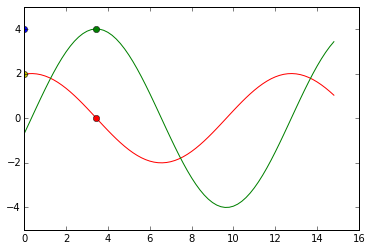

In [257]:
upoint = w1*np.cos(tt.M2FREQ*phasetime-phi)
vpoint = w2*np.sin(tt.M2FREQ*phasetime-phi)
plt.plot(t,u, 'r-')
plt.plot(t,v, 'g-')
plt.plot(phasetime,upoint, 'ro')
plt.plot(phasetime,vpoint, 'go')
plt.plot(major,'bo')
plt.plot(minor,'yo')
plt.ylim(-5,5)

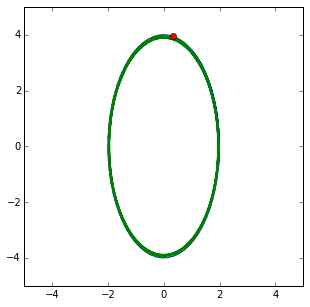

In [258]:
plt.figure(figsize=(5,5))
plt.plot(u,v)
plt.xlim(-5,5)
plt.ylim(-5,5)
t=np.arange(0,95)
plt.plot(CX*np.cos(tt.M2FREQ*t-phi)+SX*np.sin(tt.M2FREQ*t-phi),
         CY*np.cos(tt.M2FREQ*t-phi)+SY*np.sin(tt.M2FREQ*t-phi));
plt.plot(CX*np.cos(tt.M2FREQ*phasetime-phi)+SX*np.sin(tt.M2FREQ*phasetime-phi),
         CY*np.cos(tt.M2FREQ*phasetime-phi)+SY*np.sin(tt.M2FREQ*phasetime-phi), 'o');


3.18096782588e-10 4.0


(-5, 5)

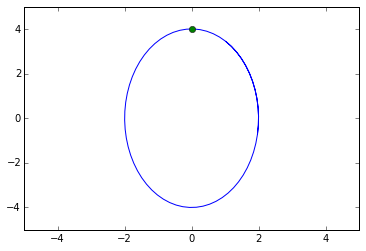

In [259]:
unew = w1*np.cos(tt.M2FREQ*phasetime-phi)
vnew = w2*np.sin(tt.M2FREQ*phasetime-phi)
plt.plot(u,v)
plt.plot(unew,vnew, 'o')
print unew, vnew
plt.xlim(-5,5)
plt.ylim(-5,5)